In [1]:
# https://hackernoon.com/histogram-equalization-in-python-from-scratch-ebb9c8aa3f23#targetText=Histogram%20Equalization%20in%20Python%20from%20Scratch&targetText=Histogram%20Equalization%20is%20one%20of,more%20equal%20across%20the%20board.

In [2]:
# https://github.com/torywalker/histogram-equalizer/blob/master/HistogramEqualization.ipynb

In [3]:
import numpy as np

def image_histogram_equalization(image, number_bins=256):
    # from http://www.janeriksolem.net/2009/06/histogram-equalization-with-python-and.html

    # get image histogram
    image_histogram, bins = np.histogram(image.flatten(), number_bins, density=True)
    cdf = image_histogram.cumsum() # cumulative distribution function
    cdf = 255 * cdf / cdf[-1] # normalize

    # use linear interpolation of cdf to find new pixel values
    image_equalized = np.interp(image.flatten(), bins[:-1], cdf)

    return image_equalized.reshape(image.shape), cdf

if __name__ == '__main__':

    # generate some test data with shape 1000, 1, 96, 96
    data = np.random.rand(1000, 1, 96, 96)

    # loop over them
    data_equalized = np.zeros(data.shape)
    for i in range(data.shape[0]):
        image = data[i, 0, :, :]
        data_equalized[i, 0, :, :] = image_histogram_equalization(image)[0]

In [4]:
from skimage import exposure
import numpy as np
def histogram_equalize(img):
    img = rgb2gray(img)
    img_cdf, bin_centers = exposure.cumulative_distribution(img)
    return np.interp(img, bin_centers, img_cdf)

In [6]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

PIC = mpimg.imread('landsat.jpg')


#histogram_equalize(PIC)
image_histogram_equalization(PIC, number_bins=256)

(array([[[ 34.54617769,  34.54617769,  34.54617769],
         [ 60.88222239,  60.88222239,  60.88222239],
         [ 51.70596522,  51.70596522,  51.70596522],
         ...,
         [191.10247934, 191.10247934, 191.10247934],
         [187.83135365, 187.83135365, 187.83135365],
         [179.99408574, 179.99408574, 179.99408574]],
 
        [[ 43.5817563 ,  43.5817563 ,  43.5817563 ],
         [ 53.85952996,  53.85952996,  53.85952996],
         [ 56.70061983,  56.70061983,  56.70061983],
         ...,
         [177.6586425 , 177.6586425 , 177.6586425 ],
         [173.17345041, 173.17345041, 173.17345041],
         [168.96957125, 168.96957125, 168.96957125]],
 
        [[ 25.74498967,  25.74498967,  25.74498967],
         [ 37.18969525,  37.18969525,  37.18969525],
         [ 56.70061983,  56.70061983,  56.70061983],
         ...,
         [179.99408574, 179.99408574, 179.99408574],
         [160.55033574, 160.55033574, 160.55033574],
         [151.65826446, 151.65826446, 151.65826446]

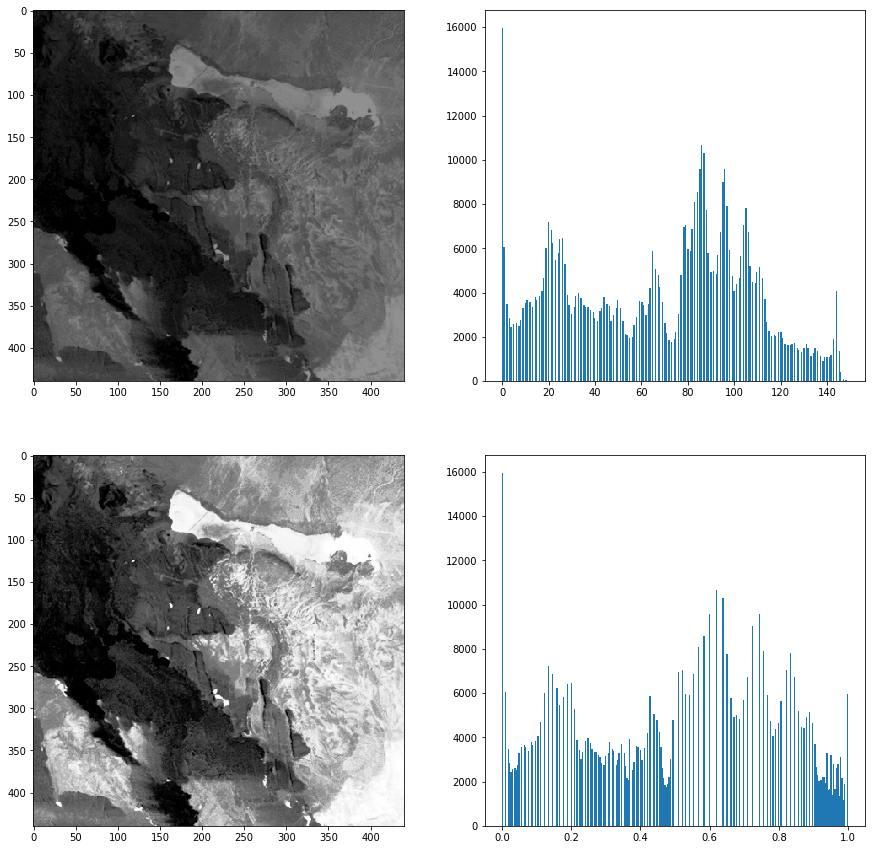

In [39]:

gray_image = 'landsat.jpg'
n_bins = 256
    
# import image, make it a flat aray
img = mpimg.imread(gray_image)
imgArr = np.array(img)
imgFlat = imgArr.flatten()
    
#array, bin sizes 0
histogram = np.zeros(n_bins) 
    
# sum up counts of pixels
for pixel in imgFlat:
    histogram[pixel] += 1
        
# return histogram #TEST
    
# cumlative sum
histogram = iter(histogram)
b = [next(histogram)]
for i in histogram:
    b.append(b[-1] + i)
        
# return np.array(b) #TEST

#normalize cum sum 0-255
cs = np.array(b)
nj = (cs - cs.min()) * 1
N = cs.max() - cs.min()
cs = nj / N
cs.astype('uint8') #can't use floating point values in images   
    
    # value from cum sum for every index in flat
imgNew = cs[imgFlat] 
imgNewShape = np.reshape(imgNew, img.shape)
    
    # DISPALY OLD-HIST, NEW-HIST
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
    
fig.add_subplot(2,2,1)
plt.imshow(img, cmap='gray')

fig.add_subplot(2,2,2)
plt.hist(imgFlat, bins=n_bins)
    
fig.add_subplot(2,2,3)
plt.imshow(imgNewShape, cmap='gray')

fig.add_subplot(2,2,4)
plt.hist(imgNew, bins=n_bins)

plt.show(block=True)
    
#return fig


In [36]:
img.size #580800
img.shape #(440,440,3)
# img.size() #int obj is not callable
# img.shape() #tuple obj not callable

imgArr.size #5800
imgArr.shape #(440, 440, 3)

imgFlat.size #580800
imgFlat.shape #(580800,)

imgNew.size #580800
imgNew.shape #(580800,)

imgNewShape.size #580800
imgNewShape.shape #(440, 440, 3)

(440, 440, 3)

In [37]:
#NORMALIZE 0-1 INSTEAD OF 0-255

In [38]:
cs.shape # (256,)
cs.size # 256

256